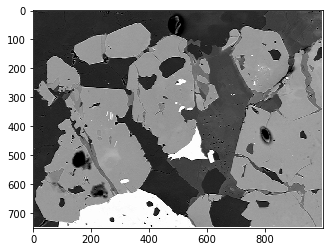

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("C:/Users/Haroon/Desktop/For CV/Micro-Youtube/BSE_Image.jpg")


# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV
img2 = np.float32(img2)

#Define criteria, number of clusters and apply k-means
#When this criterion is satisfied, the algorithm iteration stops. 
#cv.TERM_CRITERIA_EPS — stop the algorithm iteration if specified accuracy, epsilon, is reached.
#cv.TERM_CRITERIA_MAX_ITER — stop the algorithm after the specified number of iterations, max_iter.
#cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — stop the iteration when any of the above condition is met.
#Max iterations, in this example 10. 
#Epsilon, required accuracy, in this example 1.0

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Number of clusters
k = 4

# Number of attempts, number of times algorithm is executed using different initial labelings.
#Algorithm return labels that yield best compactness.
#compactness : It is the sum of squared distance from each point to their corresponding centers.

attempts = 10

#other flags needed as inputs for K-means
#Specify how initial seeds are taken.
#Two options, cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS

ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

#cv2.kmeans outputs 2 parameters.
#1 COmpactness. 
#2 Labels: Label array.
#3 Center. the array of centers of clusters. For k=4 we will have 4 centers.
#For RGB image, we will have center for each image, so tota 4x3 = 12.
#Now convert center values from float32 back into uint8.
center = np.uint8(center) 

#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
res2 = res.reshape((img.shape)) #Reshape labels to the size of original image

plt.imshow(img)


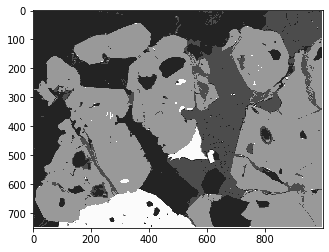

In [12]:
plt.imshow(res2)
